In [114]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from shutil import copyfile
from random import sample

In [22]:
data_dir = '/Users/ronan/Downloads/archive/'
train_path = '/Users/ronan/Downloads/archive/Train'
test_path = '/Users/ronan/Downloads/archive/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

44

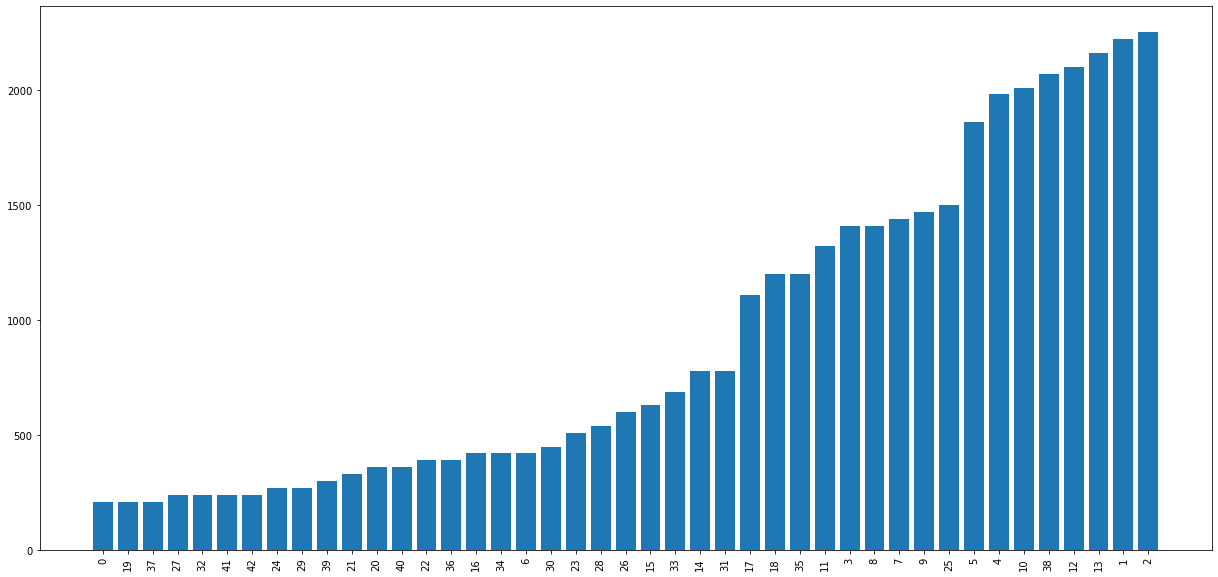

In [117]:
folders = os.listdir(train_path)
folders.remove('.DS_Store')

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(folder)
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [118]:
train_files =os.listdir(train_path+'/6')

In [119]:
len(train_files)

420

In [120]:
train_files[0:210]

['00006_00009_00022.png',
 '00006_00004_00021.png',
 '00006_00004_00009.png',
 '00006_00007_00001.png',
 '00006_00007_00015.png',
 '00006_00007_00029.png',
 '00006_00013_00029.png',
 '00006_00013_00015.png',
 '00006_00013_00001.png',
 '00006_00002_00026.png',
 '00006_00010_00009.png',
 '00006_00001_00006.png',
 '00006_00010_00021.png',
 '00006_00001_00012.png',
 '00006_00001_00013.png',
 '00006_00001_00007.png',
 '00006_00010_00020.png',
 '00006_00010_00008.png',
 '00006_00013_00000.png',
 '00006_00002_00027.png',
 '00006_00013_00014.png',
 '00006_00013_00028.png',
 '00006_00007_00028.png',
 '00006_00007_00014.png',
 '00006_00007_00000.png',
 '00006_00004_00008.png',
 '00006_00004_00020.png',
 '00006_00009_00023.png',
 '00006_00009_00009.png',
 '00006_00009_00021.png',
 '00006_00004_00022.png',
 '00006_00007_00016.png',
 '00006_00007_00002.png',
 '00006_00002_00019.png',
 '00006_00002_00025.png',
 '00006_00013_00002.png',
 '00006_00013_00016.png',
 '00006_00001_00011.png',
 '00006_0001

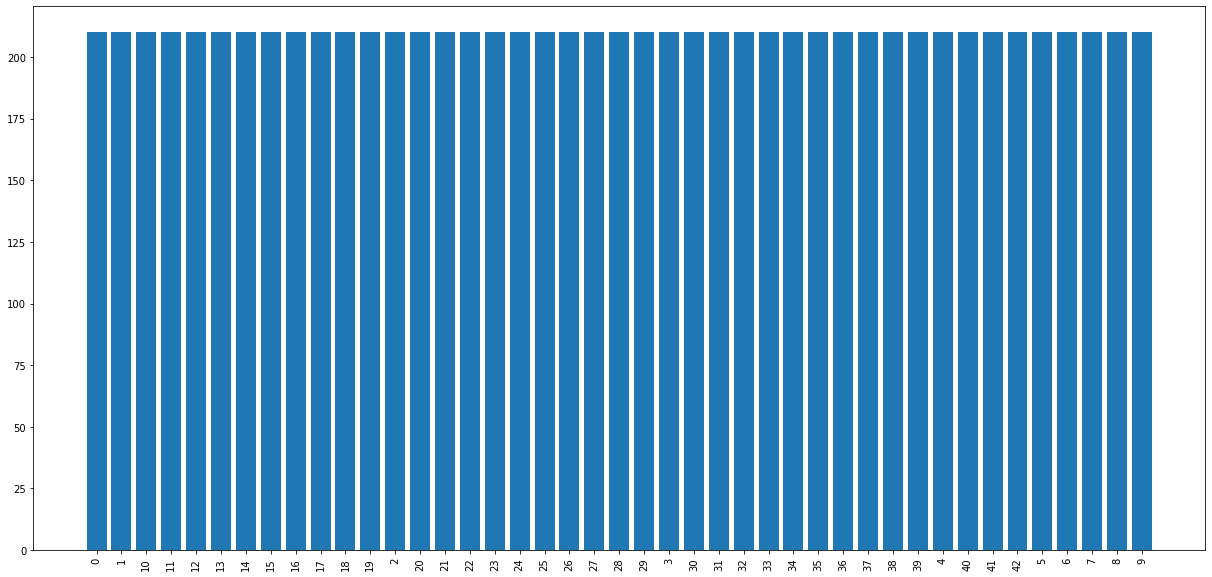

In [131]:
folders = os.listdir(train_path)
folders.remove('.DS_Store')

train_number = []
class_num = []
new_class = {}

for folder in folders:
    train_files = os.listdir(new_train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(folder)
    new_class[folder]=sample(train_files,210)
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [121]:
new_train_path = '/Users/ronan/Downloads/archive/New_Train'
os.mkdir(new_train_path)
for x in new_class:
    os.mkdir('/Users/ronan/Downloads/archive/New_Train/'+x)
    for y in new_class[x]:
        copyfile(train_path+'/'+x+'/'+y,new_train_path+'/'+x+'/'+y)

In [122]:
df = pd.read_csv('Train.csv')

In [123]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [124]:
df_1 = pd.DataFrame(columns=df.columns)
for x in new_class:
    for y in new_class[x]:
        df_path = ('Train/'+x+'/'+y)
        result = df[df['Path']==df_path]
        df_1 = pd.concat((df_1,result))

In [125]:
df_1.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
33084,50,50,6,6,45,45,32,Train/32/00032_00007_00024.png
32946,27,28,5,5,22,22,32,Train/32/00032_00003_00006.png
33023,34,37,5,6,29,32,32,Train/32/00032_00005_00023.png
33044,35,35,5,5,30,30,32,Train/32/00032_00006_00014.png
33002,27,26,6,5,22,21,32,Train/32/00032_00005_00002.png


In [126]:
df_1.to_csv('New_train.csv',index=False)